In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import sklearn

In [2]:
df2= pd.read_csv('https://query.data.world/s/bivddqattp2so2sxdpj7pwn3uodolp', encoding='ISO-8859–1')
df2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [11]:
df2['gender'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [13]:
df2.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [14]:
df2['age'][:10]

0    39.0
1    24.0
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7    19.0
8    20.0
9    30.0
Name: age, dtype: float64

In [15]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df2.bmi),
                                       stats.skew(df2.age),stats.skew(df2.claim)]},
                        index=['bmi','age','claim'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.285652
age,NaN
claim,1.515048


Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
Distribution on the basis of skewness value:

* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.


Text(0.5, 0, 'age')

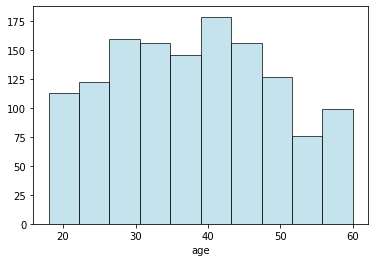

In [16]:

plt.hist(df2.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

<AxesSubplot:xlabel='age'>

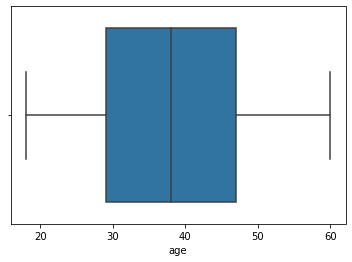

In [17]:
sns.boxplot(x=df2.age)


* We can use mean value to replace the missing values in case the data distribution is symmetric.
* Consider using median or mode with skewed data distribution.
* We can see that there are no outliers in the age column and data is not highly skewed so we can use either mean or median to fill in the missing data. 

In [18]:
df2['age']=df2['age'].replace(np.NaN,df2['age'].median())
df2['age'][:10]

0    39.0
1    24.0
2    38.0
3    38.0
4    38.0
5    38.0
6    38.0
7    19.0
8    20.0
9    30.0
Name: age, dtype: float64

In [19]:
df2.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [20]:
df2['region'][:10]

0    southeast
1    southeast
2    southeast
3    northwest
4    northwest
5    northwest
6    northwest
7    northwest
8    northwest
9    northwest
Name: region, dtype: object

In [22]:
region_missing = df2['region'].isna()

In [23]:
df2.loc[region_missing,:]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
13,14,32.0,male,27.6,100,No,0,No,NaN,1252.41
14,15,40.0,male,28.7,81,Yes,0,No,NaN,1253.94
15,16,32.0,male,30.4,86,Yes,0,No,NaN,1256.30


In [24]:
df2['region']=df2['region'].replace(np.NaN,'Unknown')

In [25]:
df2.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [331]:
df2.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078358,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082176,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


Looking at the age column, the data appears to be typical of the genuine adult population age distribution. Only a small percentage of people have more than two children. 75 percent of the population has two or fewer children.

The claim is unbalanced because most people only require basic medical care and only a handful suffer from conditions that are more expensive to treat.

In [332]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df2.bmi),
                                       stats.skew(df2.age),stats.skew(df2.claim), stats.skew(df2.children), stats.skew(df2.bloodpressure) ]},
index=['bmi','age','claim', 'children','bloodpressure'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.285652
age,0.113775
claim,1.515048
children,0.939246
bloodpressure,1.481873


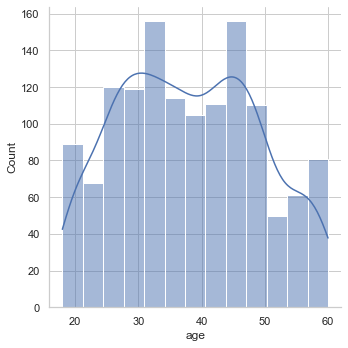

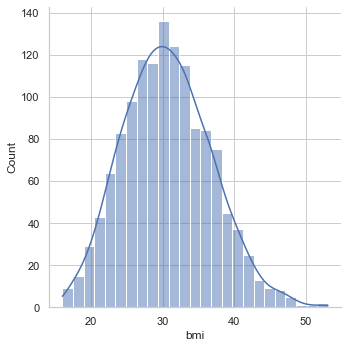

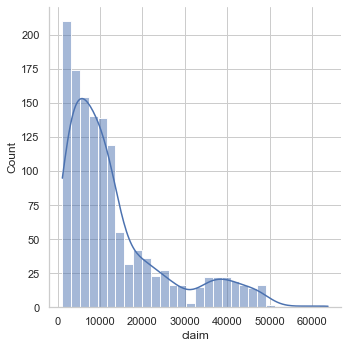

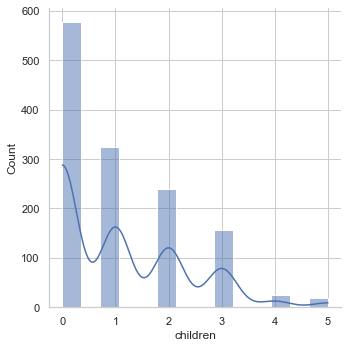

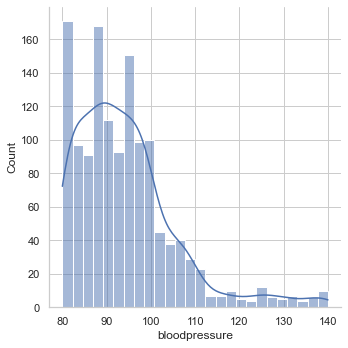

In [26]:
sns.set(style="whitegrid")
sns.displot(df2['age'], kde=True, )
sns.displot(df2['bmi'], kde=True)
sns.displot(df2['claim'], kde=True)
sns.displot(df2['children'], kde=True)
sns.displot(df2['bloodpressure'], kde=True)


Looking at the above graphs, we can say that bmi is more normally distributed when compared to others. 

<AxesSubplot:xlabel='age'>

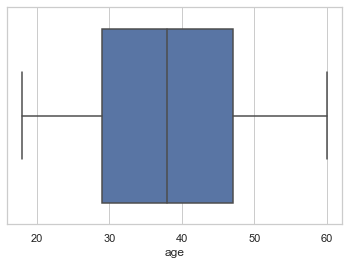

In [27]:

sns.set(style="whitegrid")
sns.boxplot(x=df2["age"], y=None)


The age data has no outliers.

<AxesSubplot:xlabel='bmi'>

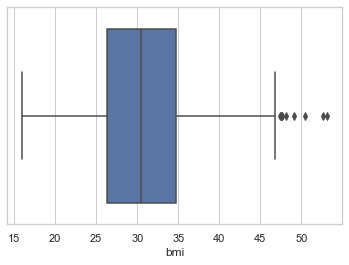

In [28]:
sns.boxplot(x=df2["bmi"], y=None)

<AxesSubplot:xlabel='claim'>

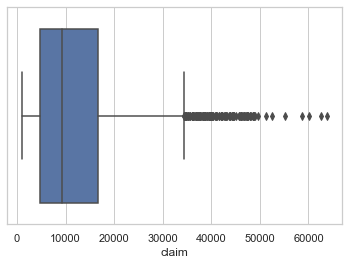

In [29]:
sns.boxplot(x=df2["claim"], y=None)

<AxesSubplot:xlabel='bloodpressure'>

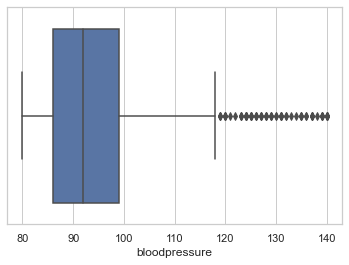

In [30]:
sns.boxplot(x=df2["bloodpressure"], y=None)

<AxesSubplot:xlabel='children'>

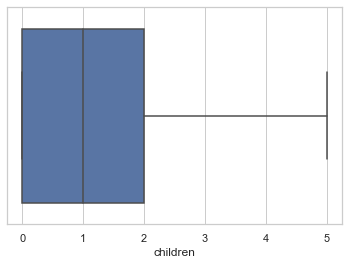

In [31]:
sns.boxplot(x=df2["children"], y=None)

<AxesSubplot:>

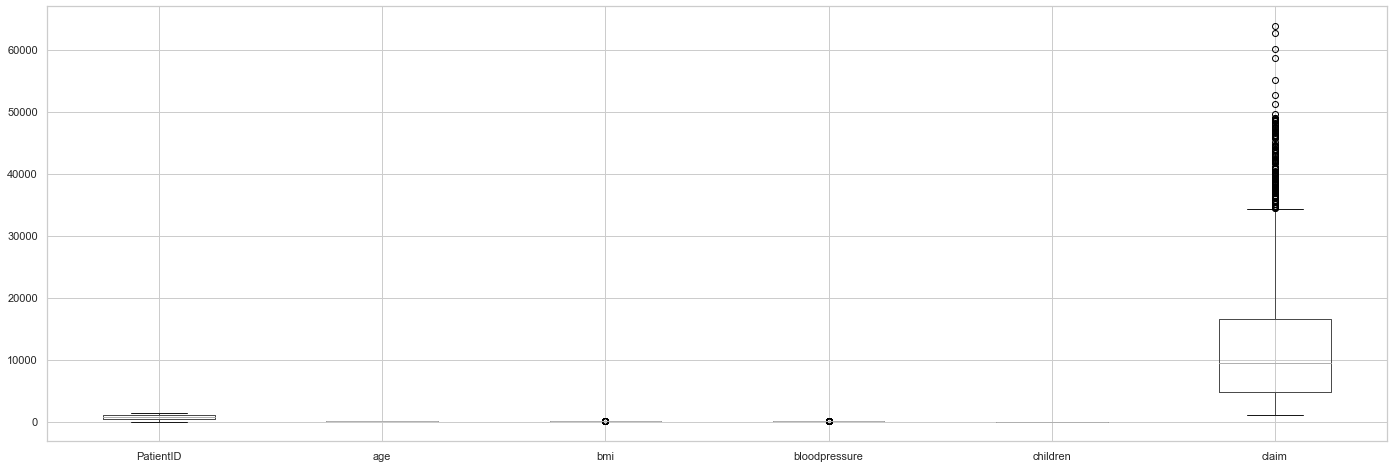

In [32]:
sns.boxplot(x=df2["claim"], y=None)

There are more outliers in claims data as most people would require basic medication and only few would suffer from diseases that is costly.

# Question 1 : Is there a relationship between Body mass index and gender?  

<AxesSubplot:xlabel='gender', ylabel='bmi'>

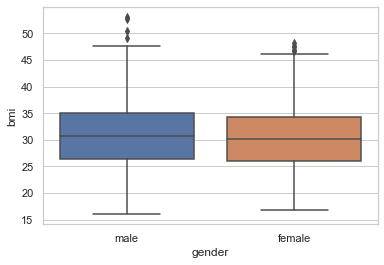

In [33]:
sns.boxplot(x='gender', y='bmi', data= df2)

We are not sure from the box plot if gender has any impact on bmi.

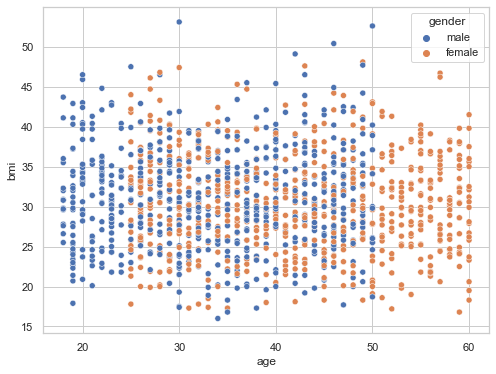

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df2.age, y=df2.bmi,hue=df2.gender  )
plt.show()

From the scatter plot above,looks like gender has no impact on bmi but we are not sure. Lets do t-test to determine this.  

In [35]:
#lets do independent t-test to test the hypothesis

Ho = "Gender has no impact on bmi."   
Ha = "Gender has an impact on bmi."   
alpha =0.05
a = np.array(df2[df2.gender == 'male'].bmi)  
b = np.array(df2[df2.gender == 'female'].bmi) 

t, p_value  = stats.ttest_ind(a,b, axis = 0)  

print(p_value)
if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the alternate hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

0.08672083693208645
0.08672083693208645 > 0.05
Hence, we accept the null hypothesis: Gender has no impact on bmi.


# Question 2: Are people with more children claiming more?	

<AxesSubplot:xlabel='children', ylabel='count'>

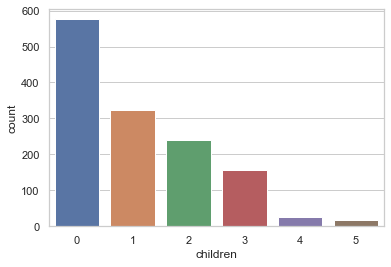

In [135]:
sns.countplot(x='children', data=df2)

Many people have no children and few people have 4 and 5 chlidren. 

<AxesSubplot:xlabel='children', ylabel='claim'>

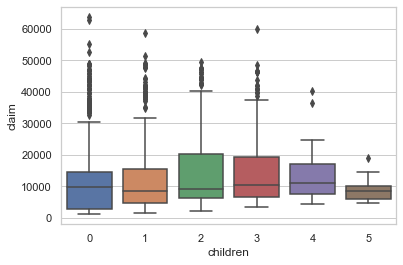

In [336]:
sns.boxplot(x='children', y='claim', data= df2)

From the above box plot we can see that people with no children are paying higher than the people with more children. For instance, people with 5 children have made less claims than people with 0 child. 

In [337]:
#lets do chi-square test to test the hypothesis

Ho = "Increase in number of children doesn't mean increase in claims made by parents."   
Ha = "Increase in number of children mean increase in claims made by parents."   
alpha =0.05
crosstab = pd.crosstab(df2['children'],df2['claim']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print('P-value =', p_value)

if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')
    

P-value = 0.4291156531605151
0.4291156531605151 > 0.05
Hence, we accept the null hypothesis: Increase in number of children doesn't mean increase in claims made by parents.


# Question 3:  Are gender and smoking habits correlated?  

<AxesSubplot:xlabel='gender', ylabel='count'>

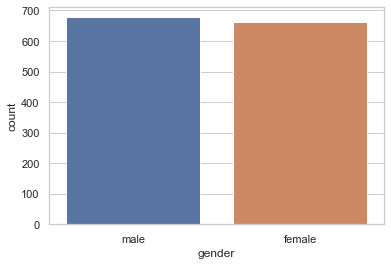

In [36]:
sns.countplot(x= 'gender', data = df2)


There is no significant difference in the male to female ratio in the data. 

<AxesSubplot:xlabel='smoker', ylabel='count'>

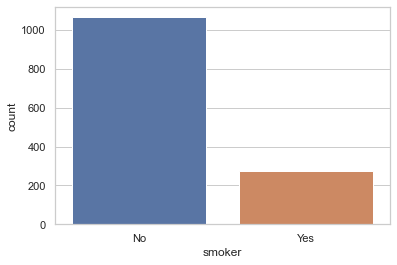

In [37]:
sns.countplot(x= 'smoker', data = df2)

There are more non-smokers in the sample data than the smokers. 

<AxesSubplot:xlabel='smoker', ylabel='count'>

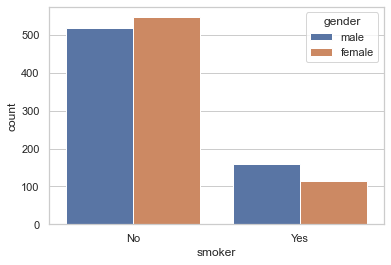

In [38]:
sns.countplot(x='smoker',hue = 'gender', data=df2)

This graph suggests that male smokes more than females.

In [39]:
# We will perform Chi_square test to check if the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits." 
Ha = "Gender has an effect on smoking habits."   
alpha = 0.05
crosstab = pd.crosstab(df2['gender'],df2['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print('P-value =', p_value)

if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis {Ho}')
    

P-value = 0.007121650243180834
0.007121650243180834 < 0.05
Hence,we reject the null hypothesis and accept the hypthesis: Gender has an effect on smoking habits.


# Question 4:  Are age and smoking habits correlated?  

<AxesSubplot:xlabel='age', ylabel='smoker'>

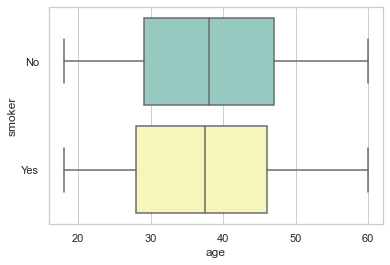

In [40]:
sns.boxplot(x="age", y="smoker",
                 data=df2, palette="Set3")

Looking at the boxplot we can see that the smoking habits is not age specific as the some of the people within the same age group are smoking whereas others are not. 

In [41]:
# We will perform Chi_square test to check the proportion of smokers differs as per age.

Ho = "Smoking habits is not related to age." 
Ha = "Smoking habits is related to age."   
alpha = 0.05
crosstab = pd.crosstab(df2['age'],df2['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print('P-value =', p_value)

if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

P-value = 0.3211436086661882
0.3211436086661882 > 0.05
Hence, we accept the null hypothesis: Smoking habits is not related to age.


# Question 5: Does the number of children have any effect on the BMI of females? 

In [63]:
#let's perform ANOVA test to see relationship between 3 groups . 

Ho = "No. of children has no effect on bmi of females."   
Ha = "No. of children has an effect on bmi of females."   

df_female = copy.deepcopy(df2[df2['gender'] == 'female'])

#lets make three groups of female , female with zero children, female with 2 children and female with 4 chlidren
c0 = df_female[df_female.children == 0]['bmi']
c1 = df_female[df_female.children == 2]['bmi']
c2= df_female[df_female.children == 4]['bmi']
f_stat, p_value = stats.f_oneway(c0,c1,c2)
print(p_value)
if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

nan
nan > 0.05
Hence, we accept the null hypothesis: No. of children has no effect on bmi of females.


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '



# Question 6: Is the patient having higher blood pressure also diabetic? 

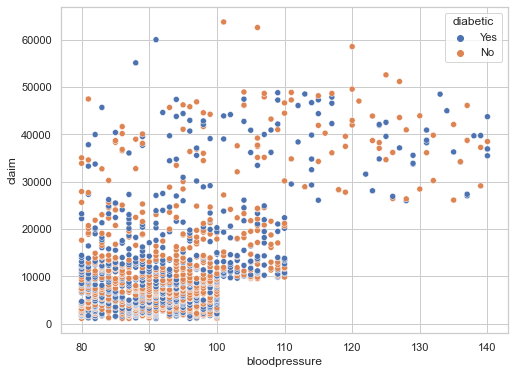

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df2.bloodpressure, y=df2.claim,hue=df2.diabetic  )
plt.show()

From the above graph we can see that most of the diabetic patients have bloodpressure from 80 to 100 . Looks like most of the diabetic patient have low blood pressure and being diabetic and having high blood pressure s not related.

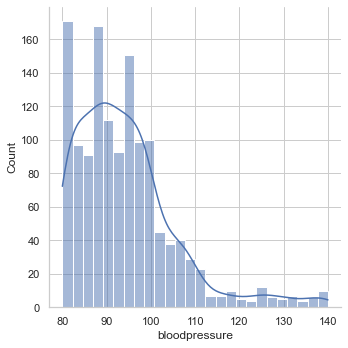

In [46]:
sns.displot(df2['bloodpressure'], kde=True)

In [47]:
#lets do independent t-test to test the hypothesis

Ho = "Having high blood pressure and being diabetic are not related."   
Ha = "Having high blood pressure and being diabetic are related."   
alpha =0.05
a = np.array(df2[df2.diabetic == 'No'].bloodpressure)  
b = np.array(df2[df2.diabetic == 'Yes'].bloodpressure) 

t, p_value  = stats.ttest_ind(a,b, axis = 0)  

print(p_value)
if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

0.6425962639741668
0.6425962639741668 > 0.05
Hence, we accept the null hypothesis: Having high blood pressure and being diabetic are not related.


# Question 7: If a patient who smokes has made higher claims? 

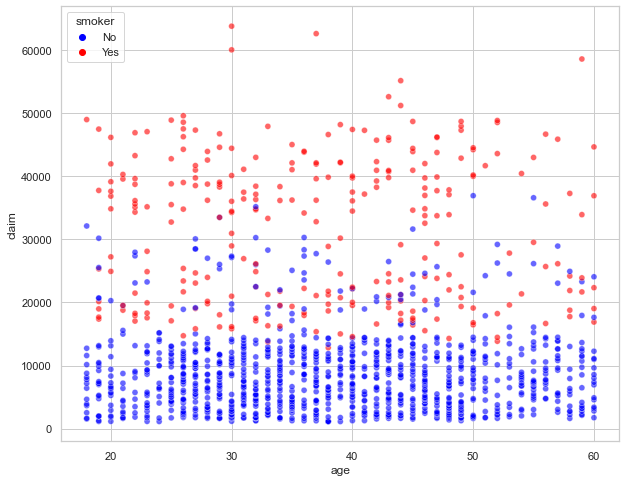

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= df2.age, y=df2.claim,hue=df2.smoker,palette= ['blue','red'] ,alpha=0.6)
plt.show()

The scatterplot above tells us that more claims have been made by people who smoke. 

In [49]:
#lets do independent t-test to test the hypothesis

Ho = "Smoking habits has no impact on increase of claims."  
Ha = "Smoking habits has an impact on increase of claims."   
alpha =0.05
a = np.array(df2[df2.smoker == 'No'].claim)  
b = np.array(df2[df2.smoker == 'Yes'].claim) 

t, p_value  = stats.ttest_ind(a,b, axis = 0)  

print(p_value)
if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

2.914915316662231e-283
2.914915316662231e-283 < 0.05
Hence,we reject the null hypothesis and accept the hypthesis: Smoking habits has an impact on increase of claims.


# Question 8 : If a patient who is diabetic has made higher claims? 

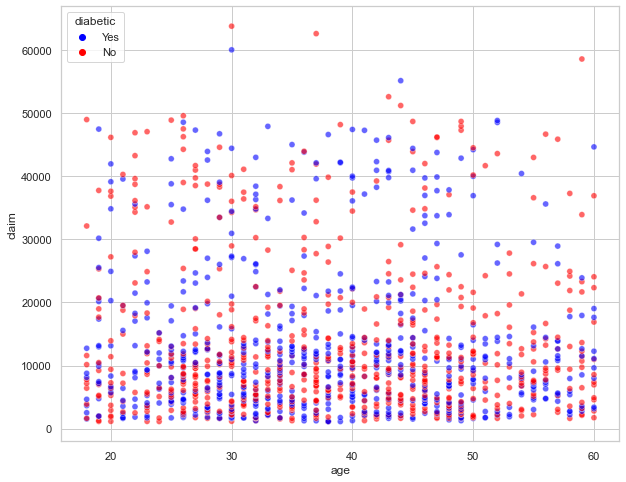

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= df2.age, y=df2.claim,hue=df2.diabetic,palette= ['blue','red'] ,alpha=0.6)
plt.show()

From the above scatterplot, we cannot precisely conclude the relationship between diabetic pateint and increase of claim. 

In [51]:
#lets do independent t-test to test the hypothesis

Ho = "Being diabetic has no impact on increase of claims."  
Ha = "Being diabetic has an impact on increase of claims."   
alpha =0.05
a = np.array(df2[df2.diabetic == 'No'].claim)  
b = np.array(df2[df2.diabetic == 'Yes'].claim) 

t, p_value  = stats.ttest_ind(a,b, axis = 0)  

print(p_value)
if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis: {Ho}')

0.7496665799159535
0.7496665799159535 > 0.05
Hence, we accept the null hypothesis: Being diabetic has no impact on increase of claims.


# Question 9: If a patient who has high blood pressure has made higher claims? 

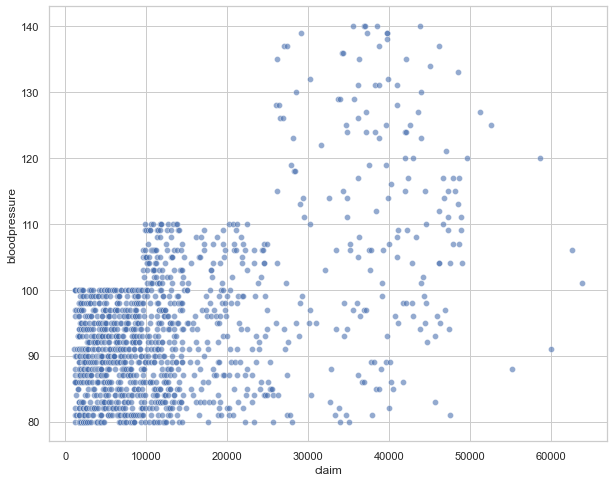

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= df2.claim, y=df2.bloodpressure,alpha=0.6)
plt.show()

The graph tells us that higher claims have been made by people with higher blood pressure. Lets do hypothesis testing to see if it is the case. 

In [53]:
# We will perform pearson’s correlation coefficient test
Ho = "High blood pressure is not related to higher claims." 
Ha = "High blood pressure is  related to higher claims"   
alpha = 0.05
stat, p_value = stats.pearsonr(df2['bloodpressure'], df2['claim'])
print('stat=%.3f, p=%.3f' % (stat, p_value))
print('P-value =', p_value)

if (p_value < alpha):
    print(f'{p_value} < {alpha}')
    print(f'Hence,we reject the null hypothesis and accept the alternate hypthesis: {Ha}')
else: 
    print(f'{p_value} > {alpha}')
    print(f'Hence, we accept the null hypothesis {Ho}')

stat=0.531, p=0.000
P-value = 1.6938057599059636e-98
1.6938057599059636e-98 < 0.05
Hence,we reject the null hypothesis and accept the alternate hypthesis: High blood pressure is  related to higher claims


So, from the analysis ,it is known that smoking habits can lead to increase in claims or charges so insurance company can enroll their insuree in wellness program to control the smoking habits. Similarly they can segregate the risky patients and enroll them in certain exercise program to make sure they are doing everything to mitigate the risk. This will help the patients in preventing the high medical bill and eventually insurance company will be benefited. This way after finding the relationship between data, better decisions can be made by health  insurance companies. 


In [54]:
corr = df2.corr(method= 'pearson')
display(corr)

,PatientID,age,bmi,bloodpressure,children,claim
PatientID,1.000000,-0.007405,0.115129,0.450602,0.128104,0.879268
age,-0.007405,1.000000,-0.041936,-0.060234,-0.025483,-0.027830
bmi,0.115129,-0.041936,1.000000,0.143544,0.012092,0.197401
bloodpressure,0.450602,-0.060234,0.143544,1.000000,-0.031682,0.531341
children,0.128104,-0.025483,0.012092,-0.031682,1.000000,0.069233
claim,0.879268,-0.027830,0.197401,0.531341,0.069233,1.000000


In [56]:
df2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.0,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.0,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1340 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1340 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [58]:
for col in df2.columns:
    if df2[col].dtype == type(object):
        label = sklearn.preprocessing.LabelEncoder()
        df2[col] = label.fit_transform(df2[col])

In [59]:
df2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,1,23.2,91,1,0,0,3,1121.87
1,2,24.0,1,30.1,87,0,0,0,3,1131.51
2,3,38.0,1,33.3,82,1,0,0,3,1135.94
3,4,38.0,1,33.7,80,0,0,0,2,1136.40
4,5,38.0,1,34.1,100,0,0,0,2,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,0,35.5,88,1,0,1,2,55135.40
1336,1337,59.0,0,38.1,120,0,1,1,1,58571.07
1337,1338,30.0,1,34.5,91,1,3,1,2,60021.40
1338,1339,37.0,1,30.4,106,0,0,1,3,62592.87


In [60]:
corr = df2.corr(method= 'pearson')
display(corr)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,1.000000,-0.007405,0.007235,0.115129,0.450602,-0.004460,0.128104,0.663159,-0.115458,0.879268
age,-0.007405,1.000000,-0.392916,-0.041936,-0.060234,-0.026067,-0.025483,-0.031813,0.005599,-0.027830
gender,0.007235,-0.392916,1.000000,0.046812,0.012437,-0.017428,0.015800,0.075366,-0.034734,0.055766
bmi,0.115129,-0.041936,0.046812,1.000000,0.143544,-0.036969,0.012092,0.003670,0.135526,0.197401
bloodpressure,0.450602,-0.060234,0.012437,0.143544,1.000000,-0.012689,-0.031682,0.418265,-0.018077,0.531341
diabetic,-0.004460,-0.026067,-0.017428,-0.036969,-0.012689,1.000000,-0.014739,0.017502,-0.026925,-0.008725
children,0.128104,-0.025483,0.015800,0.012092,-0.031682,-0.014739,1.000000,0.008355,0.047003,0.069233
smoker,0.663159,-0.031813,0.075366,0.003670,0.418265,0.017502,0.008355,1.000000,-0.054827,0.787279
region,-0.115458,0.005599,-0.034734,0.135526,-0.018077,-0.026925,0.047003,-0.054827,1.000000,-0.070991
claim,0.879268,-0.027830,0.055766,0.197401,0.531341,-0.008725,0.069233,0.787279,-0.070991,1.000000


<AxesSubplot:>

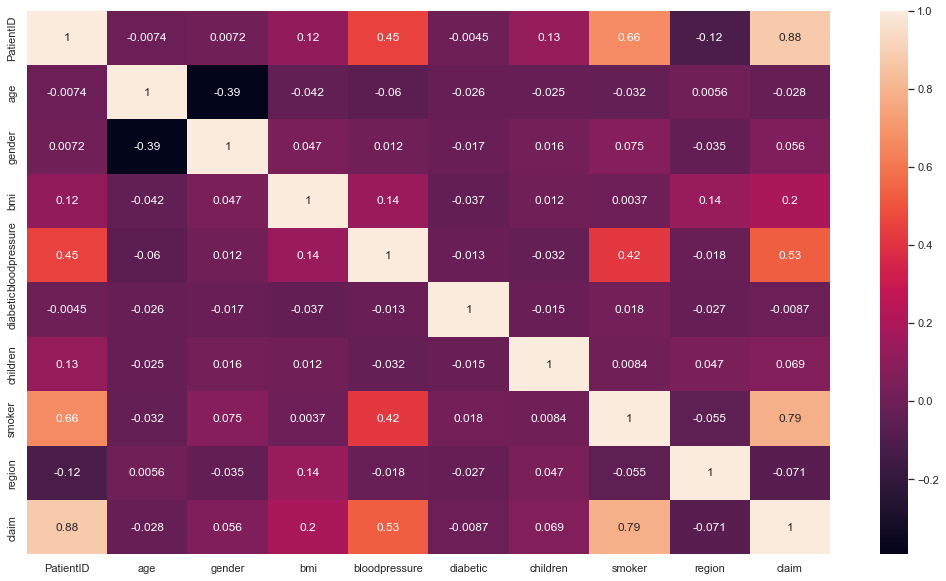

In [61]:
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot= True)